Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

LOading the Dataset

In [ ]:
iris_data = pd.read_csv('/content/IRIS.csv')

In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Ploting the Dataset Vales

<Axes: xlabel='species', ylabel='count'>

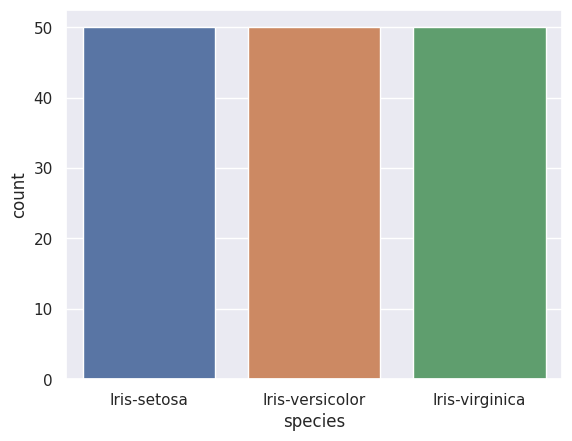

In [ ]:
sns.countplot(x= 'species', data=iris_data)

<BarContainer object of 150 artists>

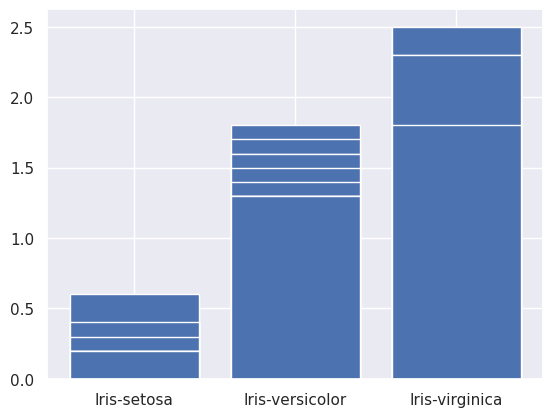

In [ ]:
plt.bar(iris_data['species'],iris_data['petal_width'])

<BarContainer object of 150 artists>

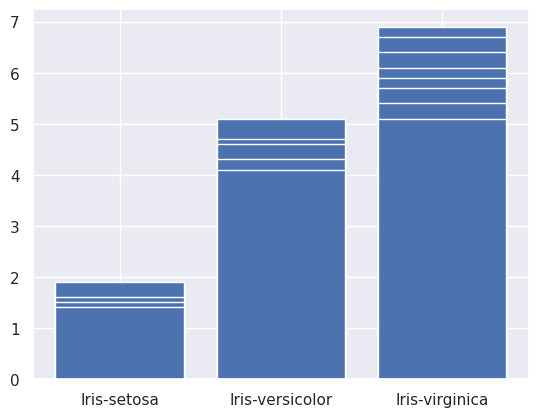

In [ ]:
plt.bar(iris_data['species'],iris_data['petal_length'])

<BarContainer object of 150 artists>

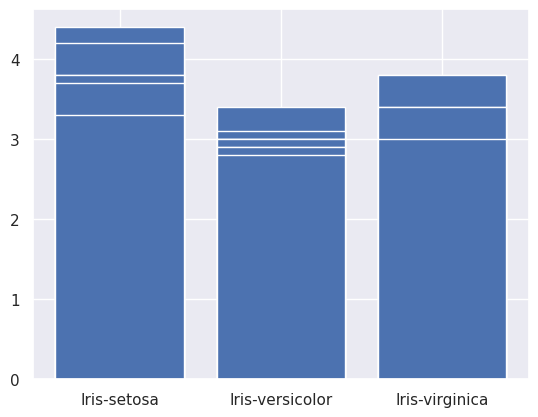

In [ ]:
plt.bar(iris_data['species'],iris_data['sepal_width'])

<BarContainer object of 150 artists>

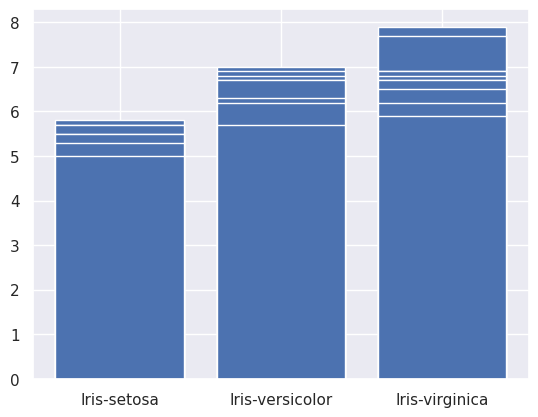

In [ ]:
plt.bar(iris_data['species'],iris_data['sepal_length'])

Data Visualization

In [ ]:
colors =['red', 'green', 'blue']
species =['Iris-setosa', 'Iris-versicolor','Iris-virginica']


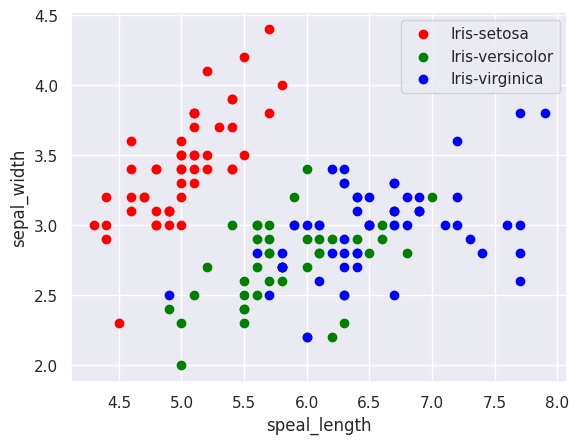

In [ ]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i],label = species[i])
plt.xlabel("speal_length")
plt.ylabel("sepal_width")
plt.legend()


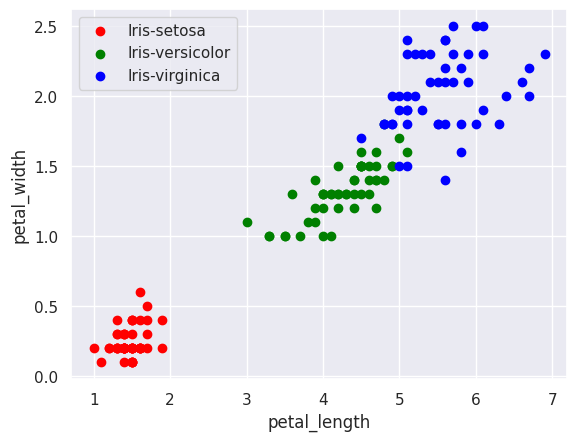

In [ ]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c= colors[i],label = species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

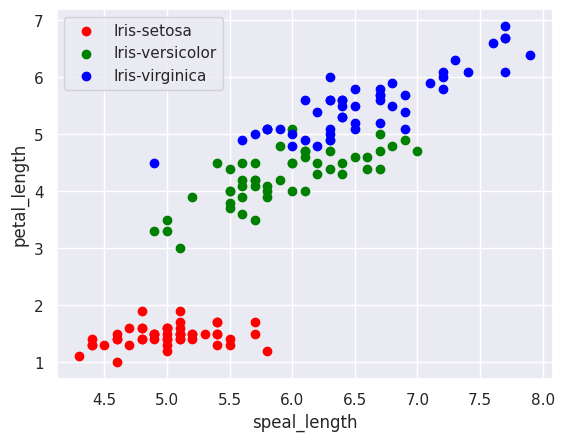

In [ ]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i],label = species[i])
plt.xlabel("speal_length")
plt.ylabel("petal_length")
plt.legend()

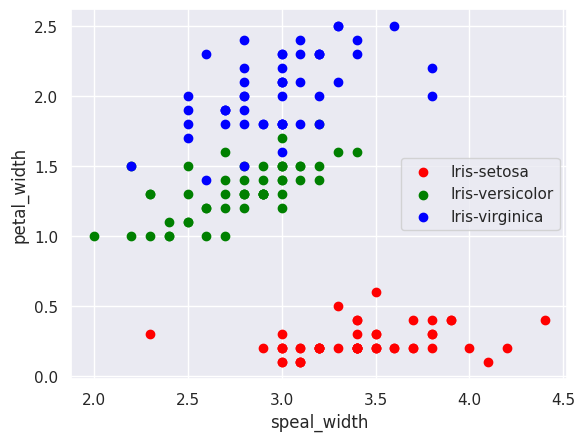

In [ ]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i],label = species[i])
plt.xlabel("speal_width")
plt.ylabel("petal_width")
plt.legend()

Correation

In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x = iris_data.drop(['species'], axis= 1)

In [ ]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris_data.corr()

<ipython-input-55-5c5a46e05691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Ploting the correaltion on heatmap

<ipython-input-58-dcfca5491c1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = iris_data.corr()


<Axes: >

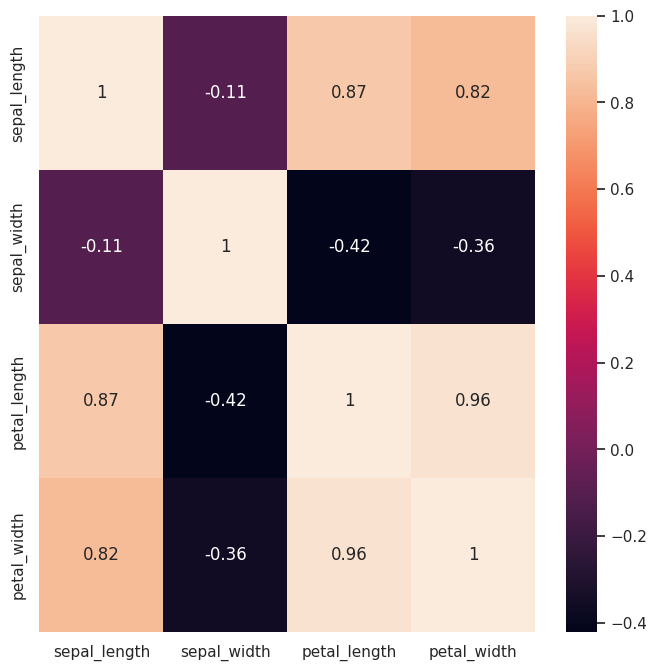

In [ ]:
correlation = iris_data.corr()
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(correlation,annot = True, ax = ax)

Encoding

In [ ]:
flowers = LabelEncoder()
iris_data['species'] = flowers.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model_ Buliding

In [ ]:
X = iris_data[['sepal_length','sepal_width','petal_length','petal_width']]
Y = iris_data['species']

In [ ]:
X_train ,X_test,Y_train, Y_test = train_test_split(X,Y,test_size = 0.35)

LogesticRegression

In [ ]:
iris_data_model = LogisticRegression()

In [ ]:
iris_data_model.fit(X_train , Y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print (f"Accuracy             : {iris_data_model.score (X_test, Y_test)*100}")

Accuracy             : 98.11320754716981


KNeighborsClassifier

In [ ]:
model_kn = KNeighborsClassifier()

In [ ]:
model_kn.fit(X_train , Y_train)

KNeighborsClassifier()

In [ ]:
print (f"Accuracy             : {model_kn.score (X_test, Y_test)*100}")

Accuracy             : 98.11320754716981


DecisionTree

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train , Y_train)

DecisionTreeClassifier()

In [ ]:
print (f"Accuracy             : {model.score (X_test, Y_test)*100}")

Accuracy             : 98.11320754716981
